### Sampling with python

   Time (s)  Temperature (°C)
0         0         21.906921
1         1         22.702661
2         2         20.928574
3         3         22.402157
4         4         22.254328


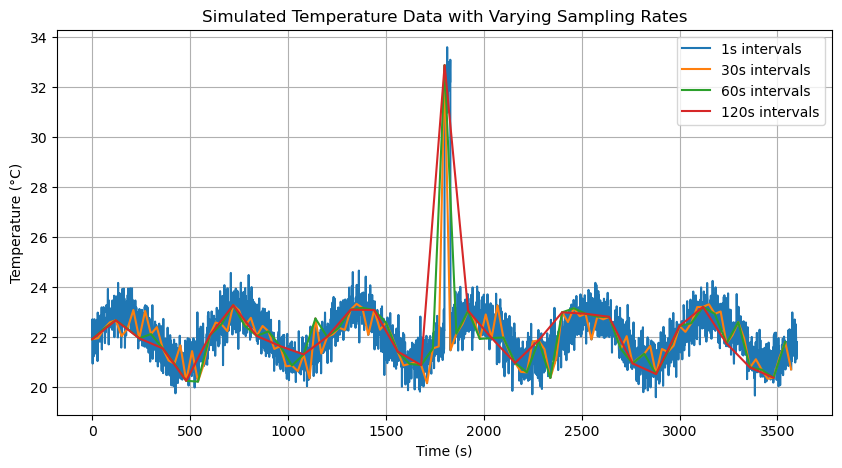

In [1]:
#load temperature_data.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression


df = pd.read_csv('Week4Data/temperature_data.csv')
print(df.head())

# sample from the loaded data at a specified interval and plot the results
def sample_and_plot(df, sample_rate, label):
    sampled_df = df.iloc[::sample_rate]  # Subsample by step size
    plt.plot(sampled_df['Time (s)'], sampled_df['Temperature (°C)'], label=label)

plt.figure(figsize=(10, 5))
sample_and_plot(df, 1, '1s intervals')
sample_and_plot(df, 30, '30s intervals')
sample_and_plot(df, 60, '60s intervals')
sample_and_plot(df, 120, '120s intervals')

plt.title('Simulated Temperature Data with Varying Sampling Rates')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


### Sampling from distribution

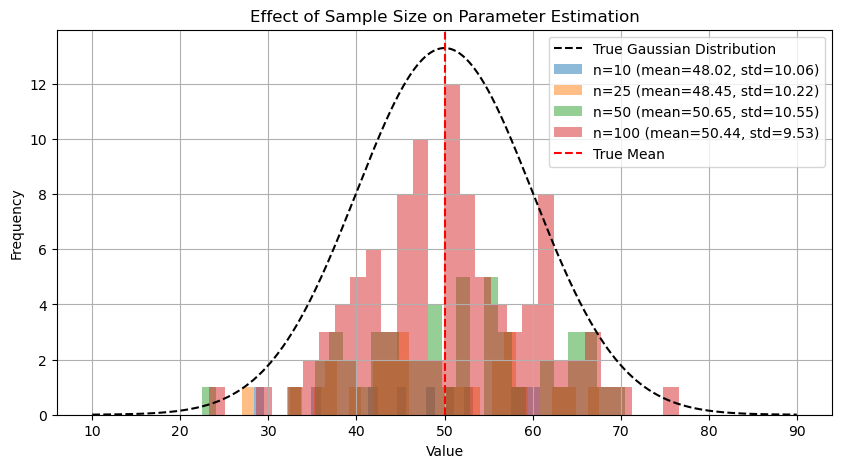

In [2]:
# Activity: Random Sampling from a True Distribution


# True distribution parameters (Normal distribution)
true_mean = 50
true_std = 10

# Sampling function
def sample_and_estimate(sample_size):
    sample = np.random.normal(true_mean, true_std, sample_size)
    estimated_mean = np.mean(sample)
    estimated_std = np.std(sample)
    return sample, estimated_mean, estimated_std

# Sampling and plotting
def plot_sampling_results(sample_sizes):
    plt.figure(figsize=(10, 5))

    # Plot the true Gaussian curve
    x = np.linspace(true_mean - 4*true_std, true_mean + 4*true_std, 1000)
    plt.plot(x, norm.pdf(x, true_mean, true_std) * 10000 / 30, 'k--', label='True Gaussian Distribution')

    for sample_size in sample_sizes:
        sample, mean, std = sample_and_estimate(sample_size)
        plt.hist(sample, bins=30, alpha=0.5, label=f'n={sample_size} (mean={mean:.2f}, std={std:.2f})')

    plt.axvline(true_mean, color='red', linestyle='--', label='True Mean')
    plt.title('Effect of Sample Size on Parameter Estimation')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Demonstrate with sample sizes of 10, 100, and 1000
plot_sampling_results([10, 25, 50, 100])


### Interpolating from model

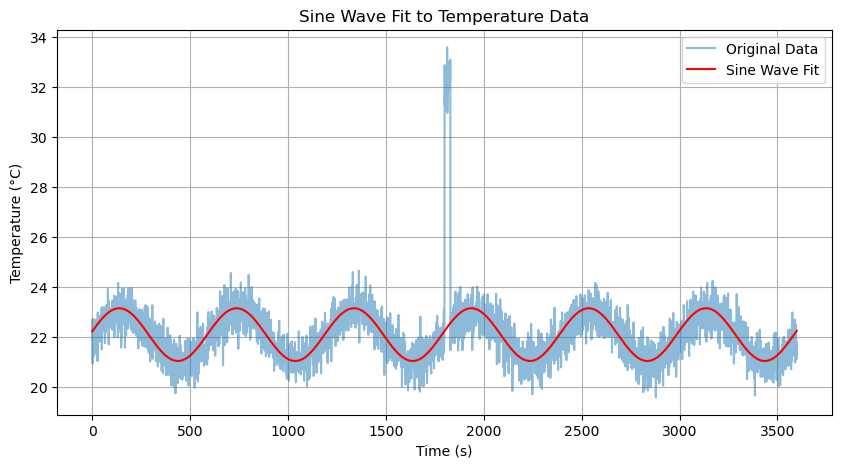

Fitted parameters: A=1.05, B=0.0105, C=0.13, D=22.09


In [3]:
# Load temperature data
df = pd.read_csv("Week4Data/temperature_data.csv")

# Define sine wave model
def sine_wave(t, A, B, C, D):
    return A * np.sin(B * t + C) + D

# Fit sine wave to data
popt, _ = curve_fit(sine_wave, df['Time (s)'], df['Temperature (°C)'], p0=[2, 2 * np.pi / 600, 0, 20])

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(df['Time (s)'], df['Temperature (°C)'], label='Original Data', alpha=0.5)

# Plot fitted sine wave
# return points on fitted model
fitted_temperature = sine_wave(df['Time (s)'], *popt)
plt.plot(df['Time (s)'], fitted_temperature, label='Sine Wave Fit', color='red')

plt.title('Sine Wave Fit to Temperature Data')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Display model parameters
print(f"Fitted parameters: A={popt[0]:.2f}, B={popt[1]:.4f}, C={popt[2]:.2f}, D={popt[3]:.2f}")

### Extrapolation

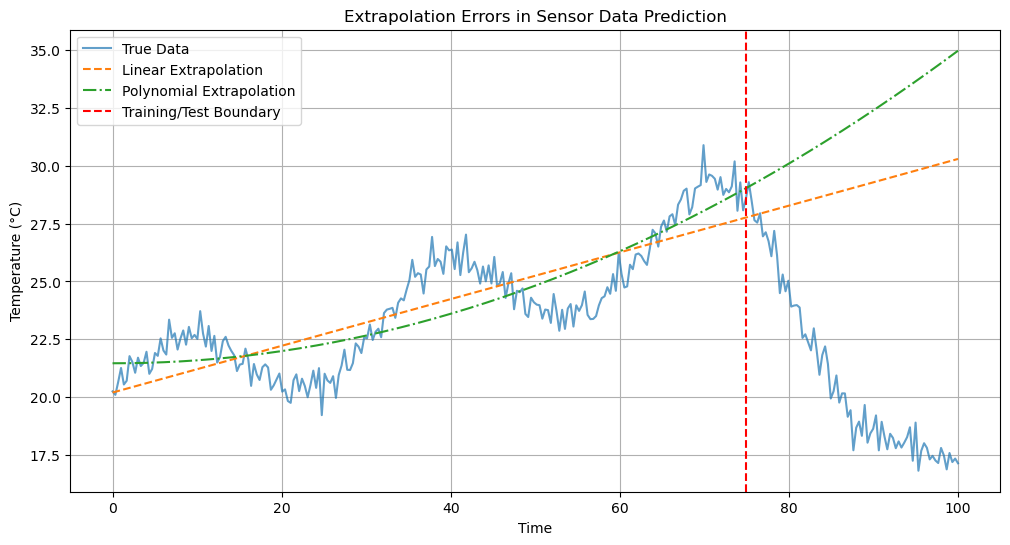

Linear Model Coefficients: 0.101, Intercept: 20.197
Polynomial Model Coefficients: [ 1.35991992e-03 -8.98180705e-04  2.14634679e+01]


In [4]:
# Generate time series data with an unexpected deviation
np.random.seed(42)

time = np.linspace(0, 100, 300)  # 300 time points
train_end = 225  # 75% of data for training

# Base trend: steady increase with oscillations
temperature = 20 + 0.1 * time + 2 * np.sin(0.2 * time) + np.random.normal(0, 0.5, len(time))

# Sudden change in system behavior
temperature[train_end:] += np.linspace(0, -15, 75)  # Gradual drop in temperature

# Prepare dataset
df = pd.DataFrame({'Time': time, 'Temperature': temperature})

df.to_csv("sensor_data.csv", index=False)

# Split data into training (first 75%) and test (last 25%)
train_df = df.iloc[:train_end]
test_df = df.iloc[train_end:]

# Linear model fit
model = LinearRegression()
model.fit(train_df[['Time']], train_df['Temperature'])
linear_pred = model.predict(df[['Time']])

# Polynomial model fit
def poly_model(x, a, b, c):
    return a * x**2 + b * x + c

popt, _ = curve_fit(poly_model, train_df['Time'], train_df['Temperature'])
poly_pred = poly_model(df['Time'], *popt)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Temperature'], label='True Data', alpha=0.7)
plt.plot(df['Time'], linear_pred, label='Linear Extrapolation', linestyle='--')
plt.plot(df['Time'], poly_pred, label='Polynomial Extrapolation', linestyle='-.')

plt.axvline(train_df['Time'].max(), color='red', linestyle='--', label='Training/Test Boundary')
plt.title('Extrapolation Errors in Sensor Data Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Display coefficients
print(f"Linear Model Coefficients: {model.coef_[0]:.3f}, Intercept: {model.intercept_:.3f}")
print(f"Polynomial Model Coefficients: {popt}")